In [9]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import scipy as sc
import textwrap
import pickle
from scipy.interpolate import CubicSpline


%matplotlib inline

# define figure size parameters to make figures larger than default
figwidth=10
figheight=10
def raftplot(run,qepath):
    filename='RaftRun'+str(run)+'.p'
    #qepath='/Users/ritz/LSST/CCD-analysis/raftResults/qefiles/'

    f=open(filename,'rb')
    raft_name=pickle.load(f)
    res=pickle.load(f)
    ccd_list=pickle.load(f)
    file_list=pickle.load(f)
    fw=pickle.load(f)
    gains=pickle.load(f)
    #print(fw)
    f.close()
#    print(raft_name[raft_name.index("RTM"):])
#    print(raft_name,res,ccd_list,file_list)
#    for key in res.keys():
#        print("Key : {} , Value : {}".format(key,res[key]))
     #for key,value in res.items():
      #print("Key : {} , Value : {}".format(key,value))    
#    for ccd, noise in res.items(): 
#        print(ccd, noise,'\n') 
    if (ccd_list[0][0][0:3]=='ITL'):
        imark='^'
        rcolor='b'
    else:
        imark='o'
        rcolor='r'
    fig1=plt.figure(1,[figwidth,figheight])
    plt.subplot(211)
    plt.title('QE by AMP and Average '+raft_name[raft_name.index("RTM"):])
    plt.ylabel('QE')
    ax=fig1.gca()
    ax.grid(True)
    ax.set_xticks(np.arange(300, 1150, 50.))
    ax.set_yticks(np.arange(0, 110., 5.))
    cmap = { 0:'r',1:'g',2:'b',3:'c',4:'m',5:'y',6:'k',7:'gray',8:'orange',9:'darkslateblue',10:'coral',11:'darkblue',12:'darkred'}
    qesimple=np.zeros((36,17,9))
    qepathrun=qepath+str(run)+'/'
    for i in range (0,9):
        filename=str(qepathrun+ccd_list[i][0]+'_QE.fits')
#        print(filename)
        hdulist=fits.open(filename)
#    hdulist.info()
        qedata=hdulist[1].data # 1 contains the qe curves, 2 contains the band qe. See hdulist.info()
        wavelength=qedata['WAVELENGTH']
        for iamp in range (1,17):
            if (iamp<10):
                samp='AMP0'+str(iamp)
            else:
                samp='AMP'+str(iamp) 
            if (qedata[samp].shape[0]>8):
                goodqe= True 
                #print("shape of qedata is ",qedata[samp].shape[0])
                qesimple[:,iamp,i]=qedata[samp]
                plt.scatter(wavelength,qedata[samp],10,cmap[i],imark)
            else:
                goodqe = False 
# there are more compact ways to take the mean of the non-zero segments, but this is clearest
    qeraft=np.zeros(len(wavelength))
    nseg=0
    for iccd in range(0,9):
        nseg+=np.count_nonzero(qesimple[0,1:17,iccd])
#        print("for ccd ",iccd," number of nonzero segments is", np.count_nonzero(qesimple[0,1:17,iccd]))
        for iwave in range(0,len(wavelength)):
            for iamp in range (1,17):
                qeraft[iwave]+=qesimple[iwave,iamp,iccd]

    lambda1=np.arange(321,1100,1)                
    if (goodqe and (run!=11063)):
        qeraft=qeraft/nseg
#        print('hello ',run)
#        print(wavelength,qeraft)
        qe=CubicSpline(wavelength, qeraft)
        qecurve=qe(lambda1)
        plt.plot(lambda1, qecurve,rcolor,linewidth=6,label='average',alpha=0.2)
        plt.show()
    else:
        qecurve=np.zeros(len(lambda1))
        if (run==11063):
            print("One bad segment of QE data")
        else:
            print("\n \n Protocol C for this run so no detailed QE curve available \n")
#    plt.scatter(wavelength,qeraft,50,rcolor,imark)
#    plt.legend(loc='upper right',prop={'size':7})
    # now plot the noise
    fig2=plt.figure(2,[figwidth,figheight])
    plt.subplot(211)
    plt.title('noise by AMP for '+raft_name[raft_name.index("RTM"):])
    plt.ylabel('noise (rms)')
    ax=fig2.gca()
    ax.grid(True)
    ax.set_xticks(np.arange(0, 16, 1.))
    ax.set_yticks(np.arange(0, 50., 2.))
    ax.set_ylim([0.,40.])
    iseg=np.arange(0,16,1)
    icol=0
    for ccd, noise in res.items(): 
        plt.scatter(iseg,noise,40,cmap[icol],imark,label=ccd)
        icol+=1
    plt.legend(loc='upper left',prop={'size':9})
    plt.show()
#
    fig3=plt.figure(3,[figwidth,figheight])
    plt.subplot(211)
    plt.title('full_well by AMP for '+raft_name[raft_name.index("RTM"):])
    plt.ylabel('full_well(e)')
    ax=fig3.gca()
    ax.grid(True)
    ax.set_xticks(np.arange(0, 16, 1.))
    #ax.set_yticks(np.arange(0, 50., 2.))
    ax.set_ylim([0.,250000.])
    iseg=np.arange(0,16,1)
    icol=0
    for ccd, fullwell in fw.items(): 
        plt.scatter(iseg,fullwell,40,cmap[icol],imark,label=ccd)
        icol+=1
    plt.legend(loc='lower left',prop={'size':9})
    plt.show()
#
    fig4=plt.figure(4,[figwidth,figheight])
    plt.subplot(211)
    plt.title('gain by AMP for '+raft_name[raft_name.index("RTM"):])
    plt.ylabel('gain(e/ADU)')
    ax=fig4.gca()
    ax.grid(True)
    ax.set_xticks(np.arange(0, 16, 1.))
    #ax.set_yticks(np.arange(0, 50., 2.))
    ax.set_ylim([0.,3.])
    iseg=np.arange(0,16,1)
    icol=0
    for ccd, gain in gains.items(): 
        plt.scatter(iseg,gain,40,cmap[icol],imark,label=ccd)
        icol+=1
    plt.legend(loc='upper left',prop={'size':9})
    plt.show()



    return qecurve,qesimple,raft_name[raft_name.index("RTM"):]

Run  10517 :


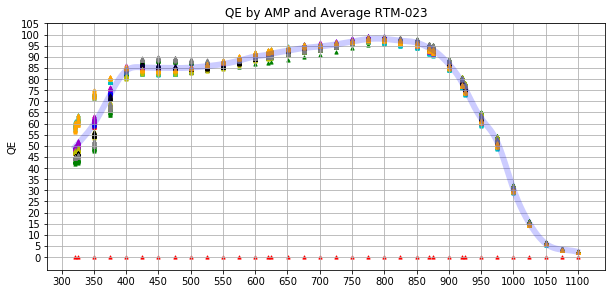

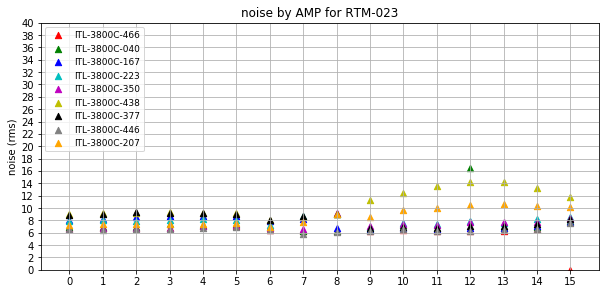

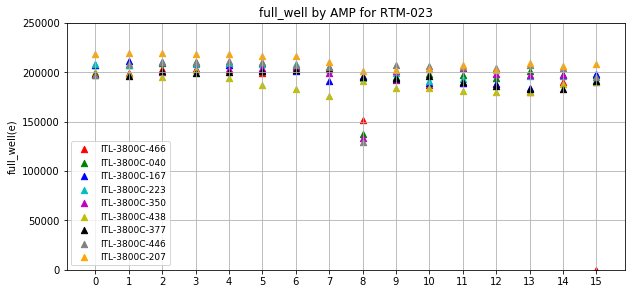

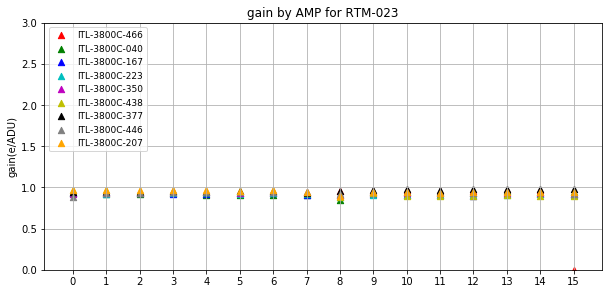

Run  10669 :

 
 Protocol C for this run so no detailed QE curve available 



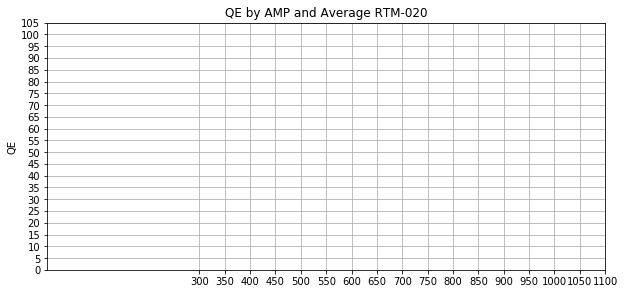

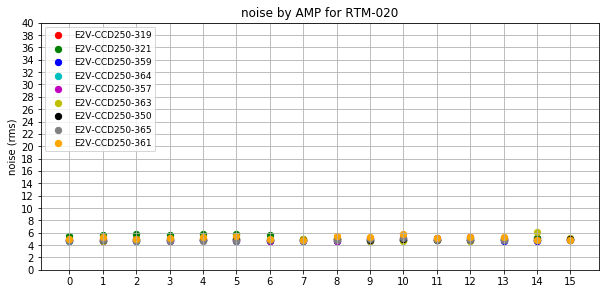

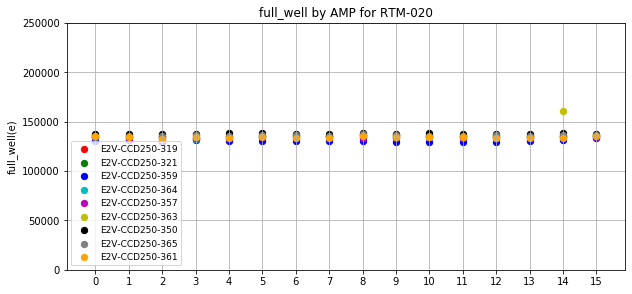

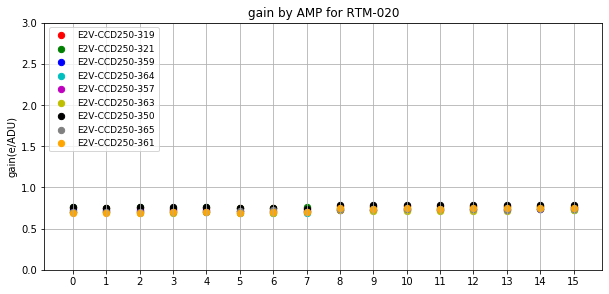

Run  10722 :

 
 Protocol C for this run so no detailed QE curve available 



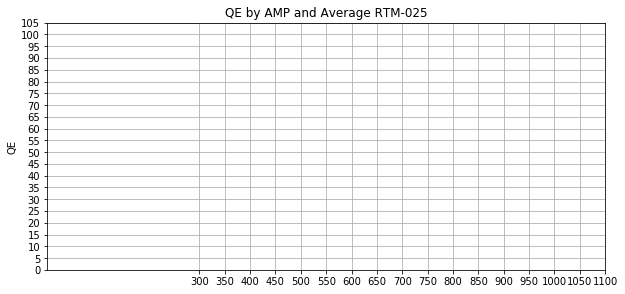

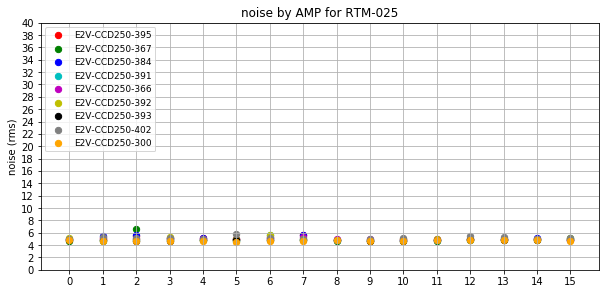

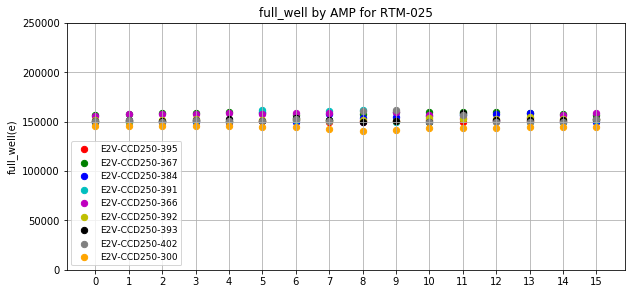

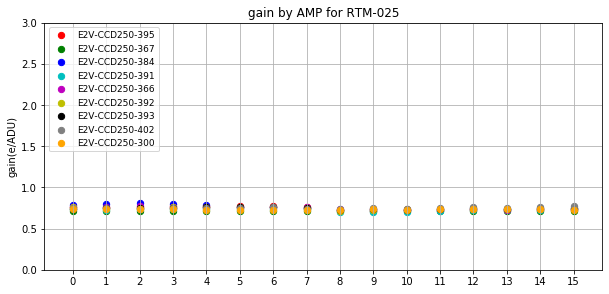

Run  10861 :


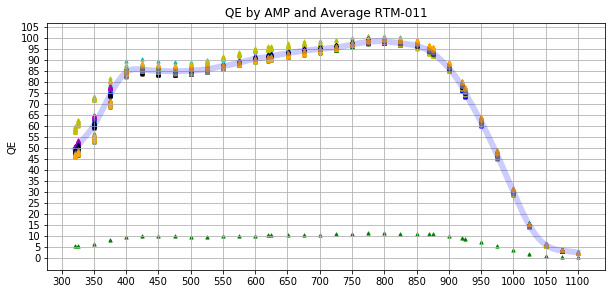

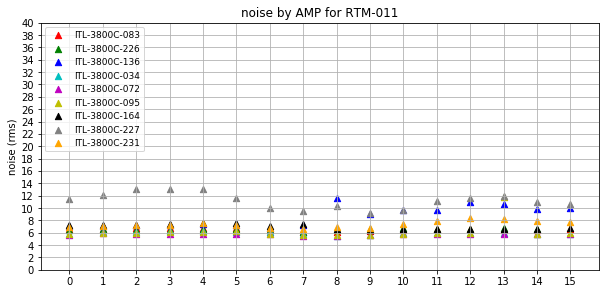

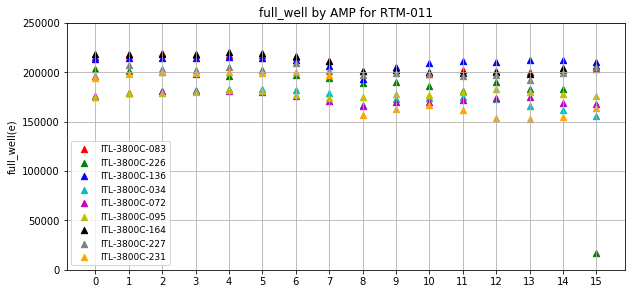

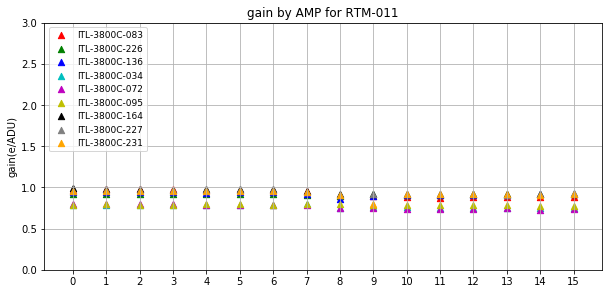

Run  10928 :


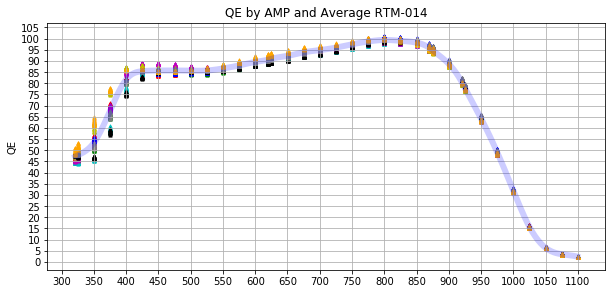

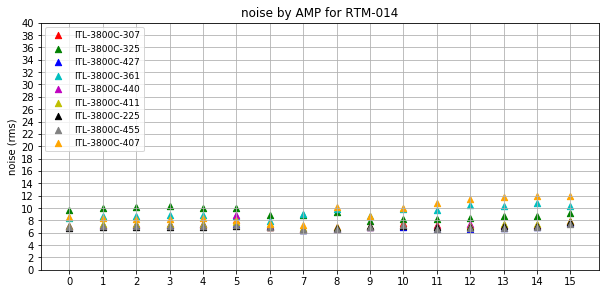

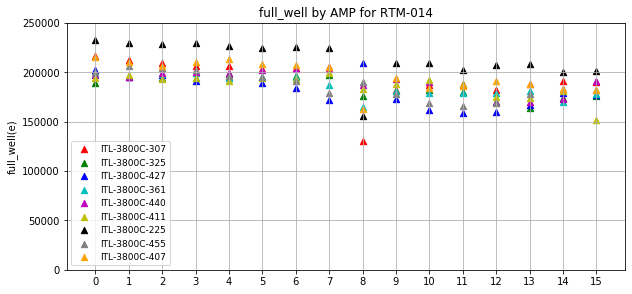

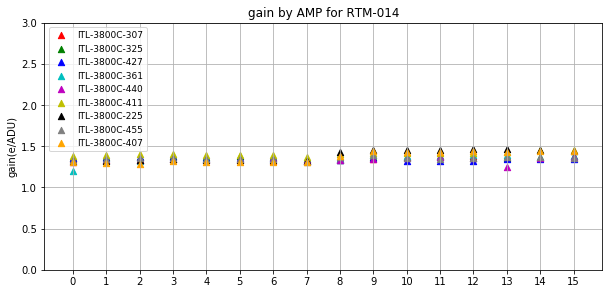

Run  10982 :


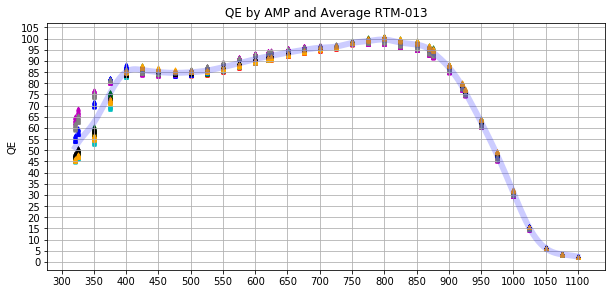

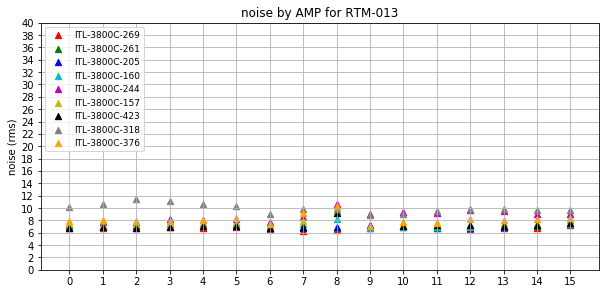

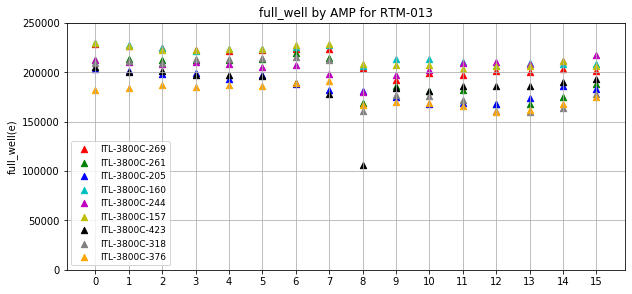

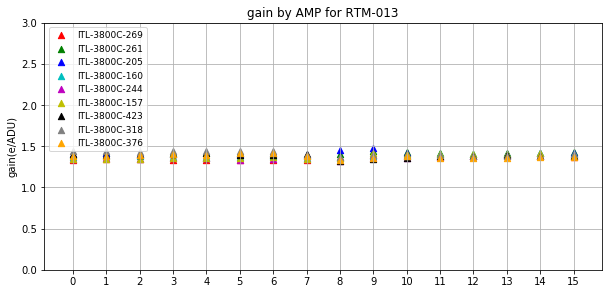

Run  11166 :

 
 Protocol C for this run so no detailed QE curve available 



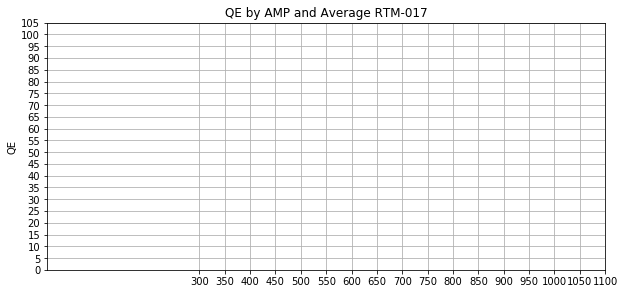

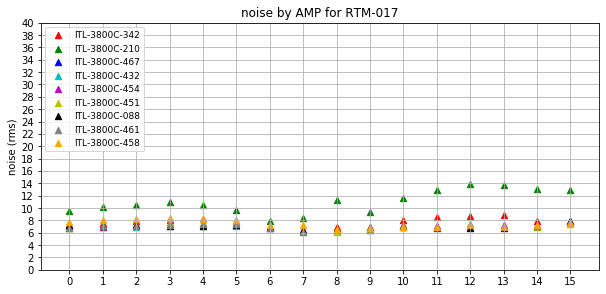

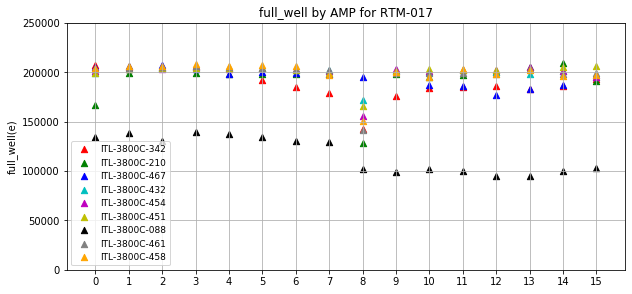

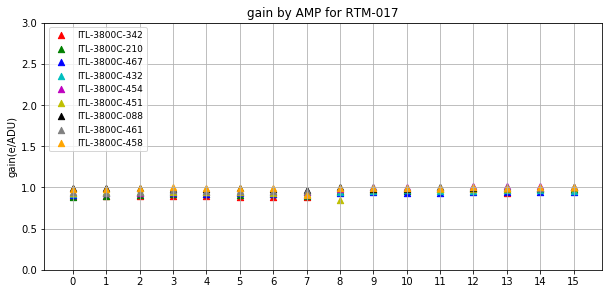

Run  11351 :


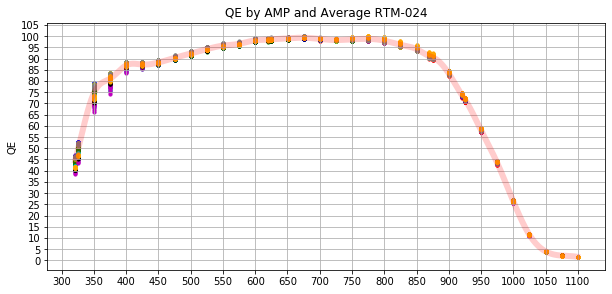

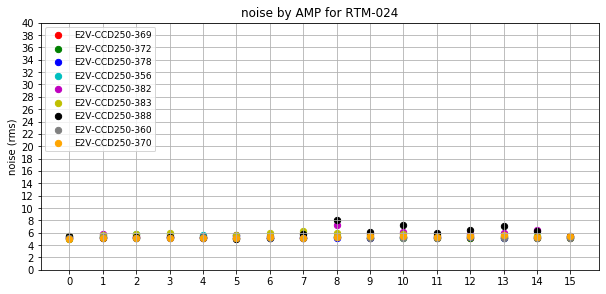

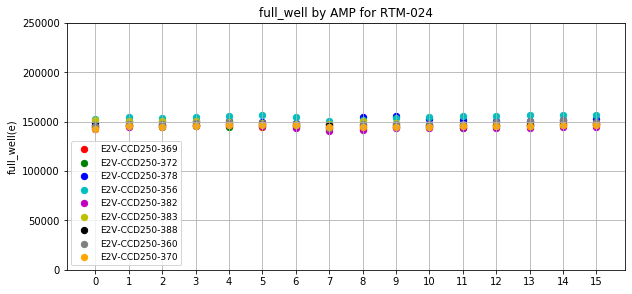

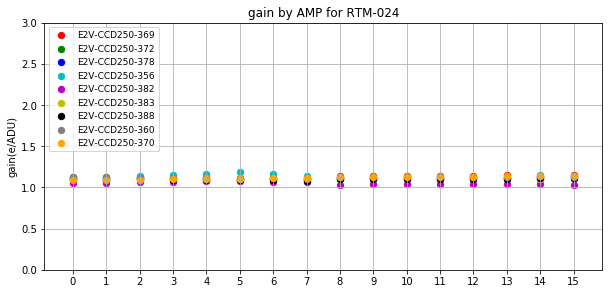

Run  11415 :


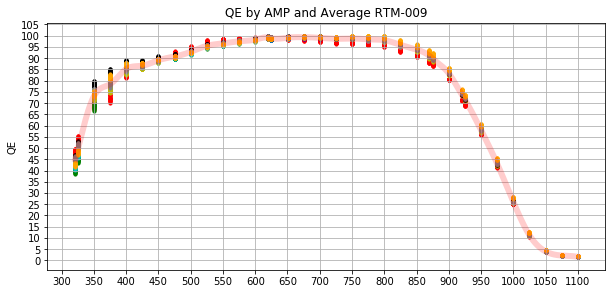

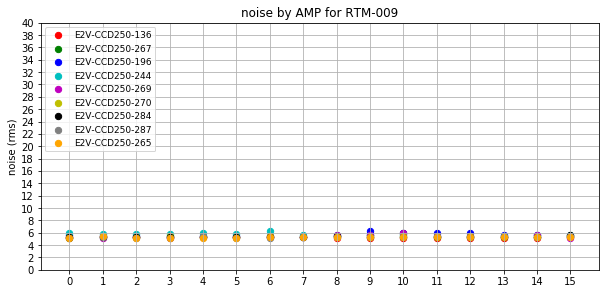

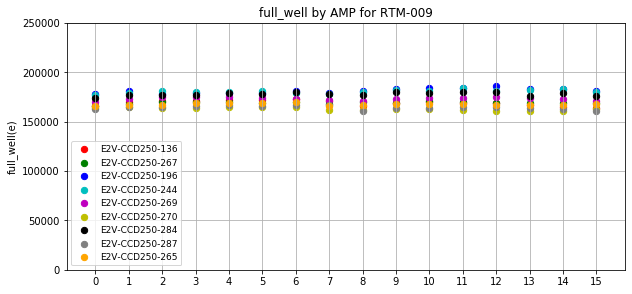

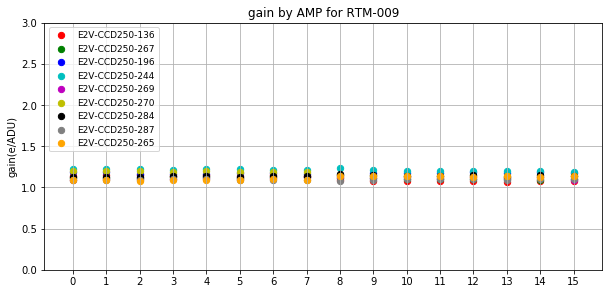

Run  11671 :


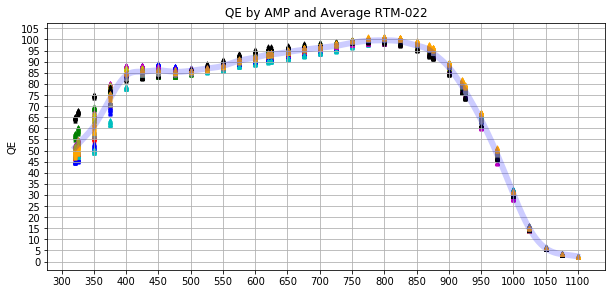

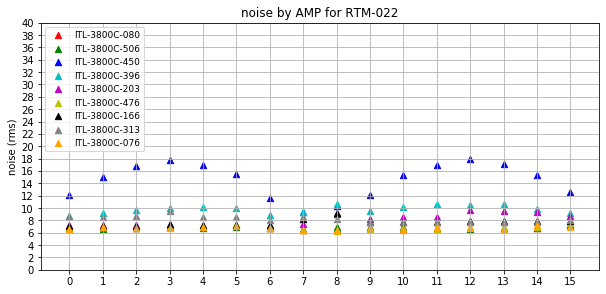

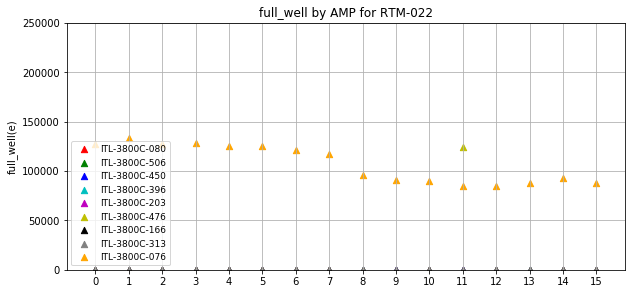

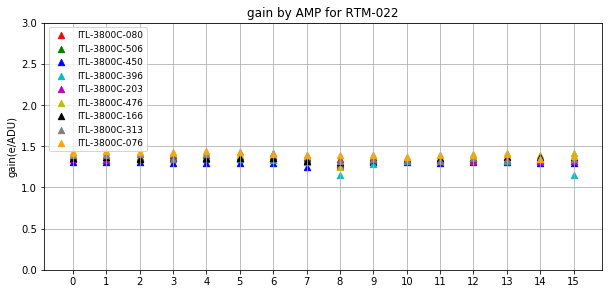

Run  11746 :


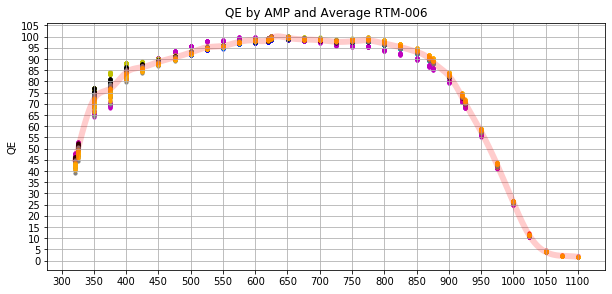

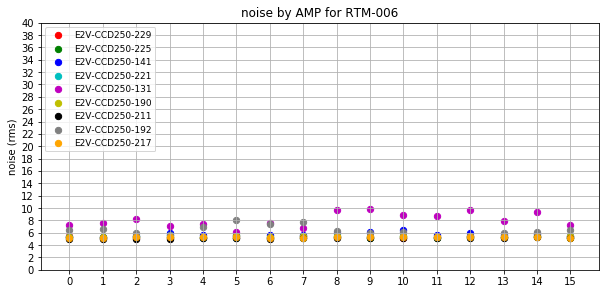

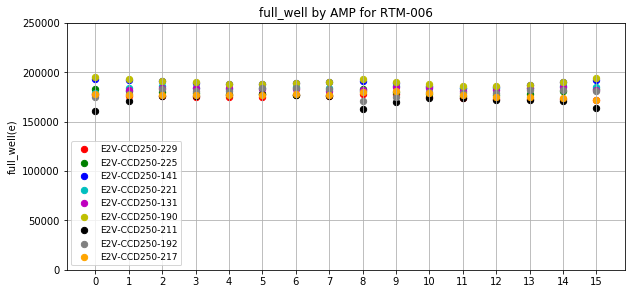

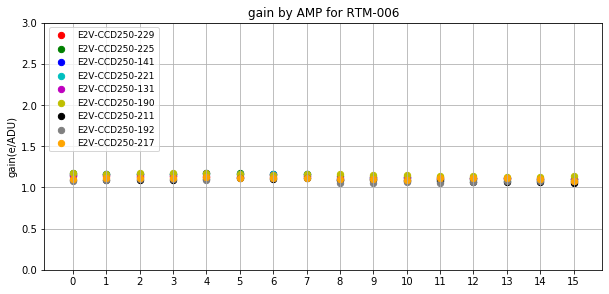

Run  11808 :


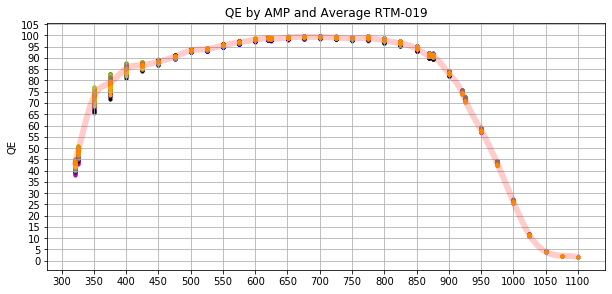

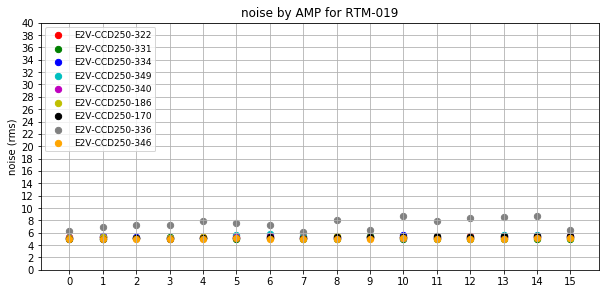

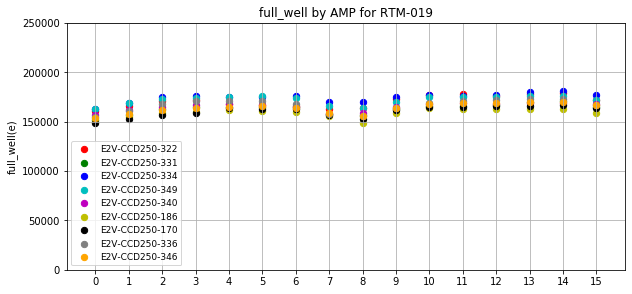

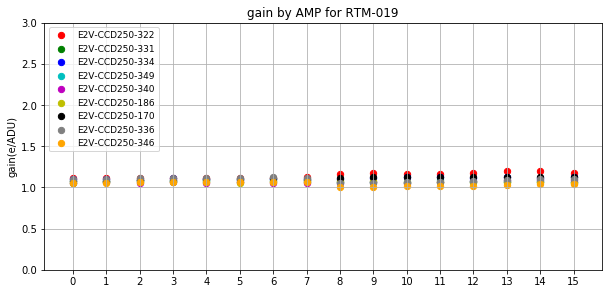

Run  11852 :


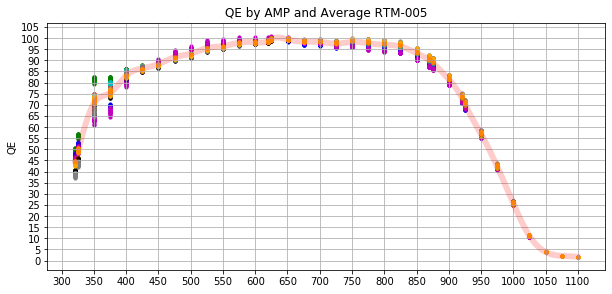

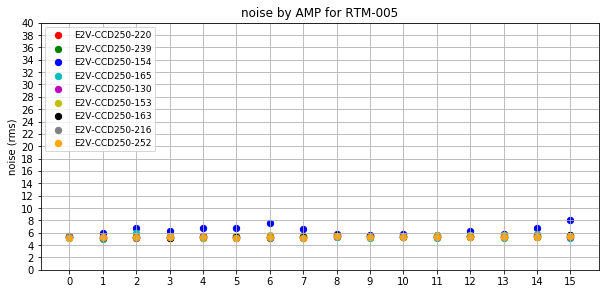

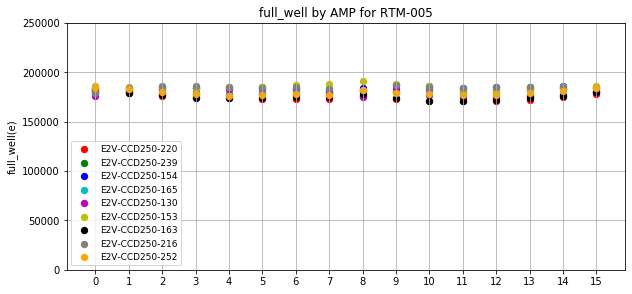

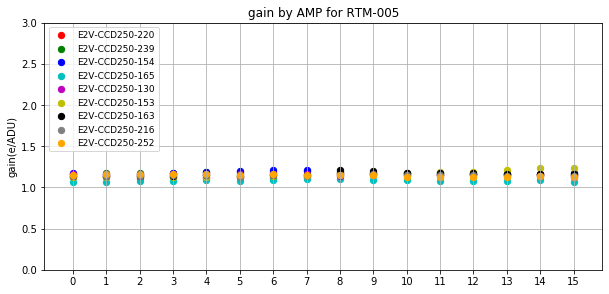

Run  11903 :


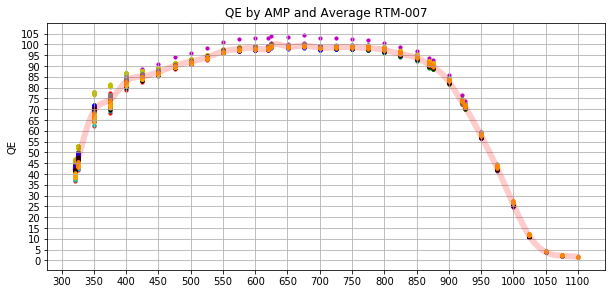

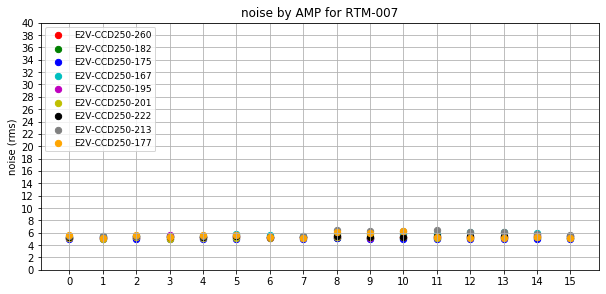

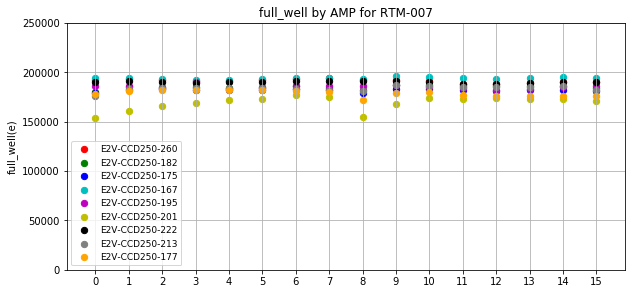

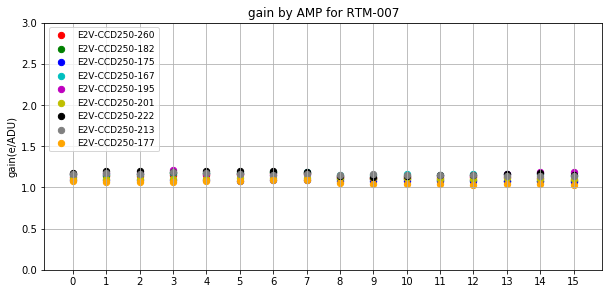

Run  11952 :


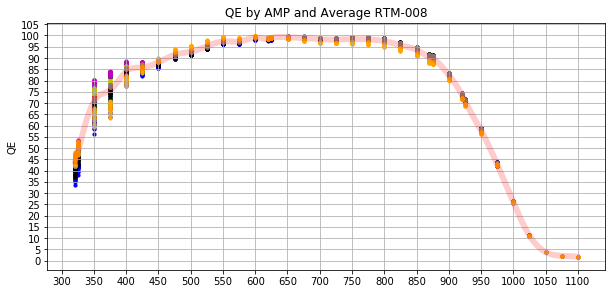

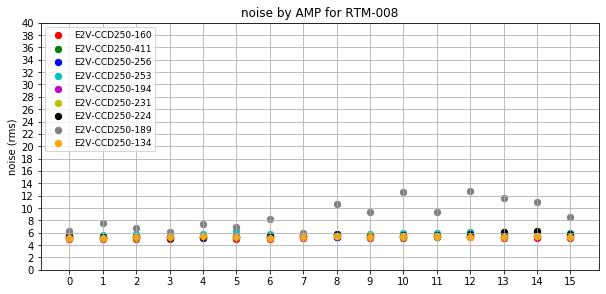

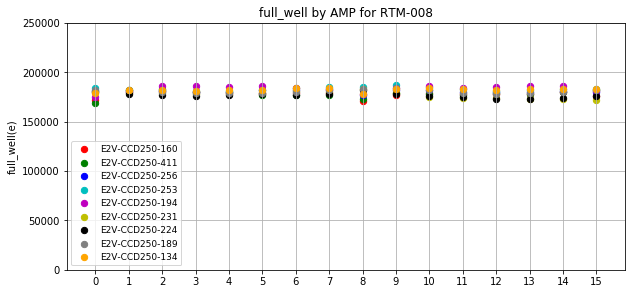

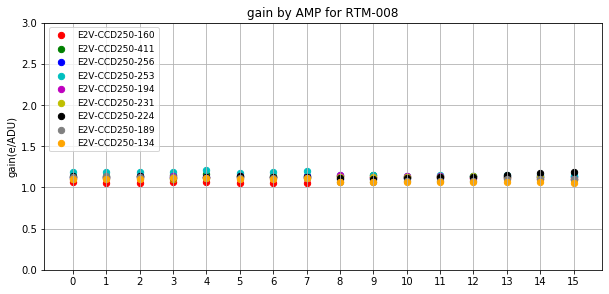

Run  12002 :

 
 Protocol C for this run so no detailed QE curve available 



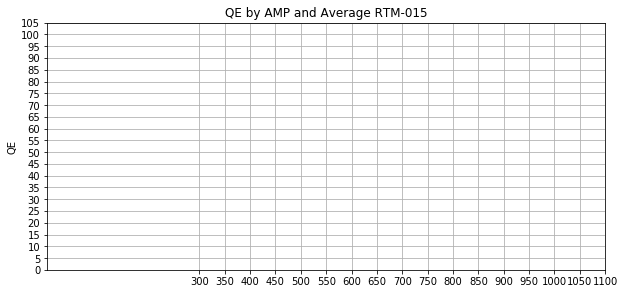

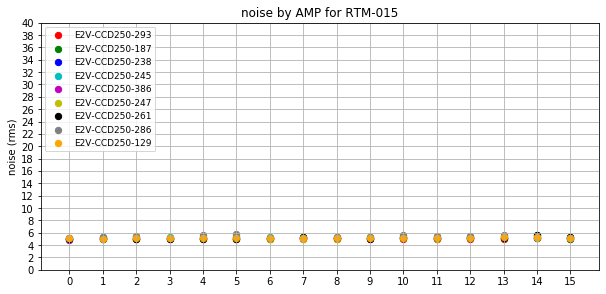

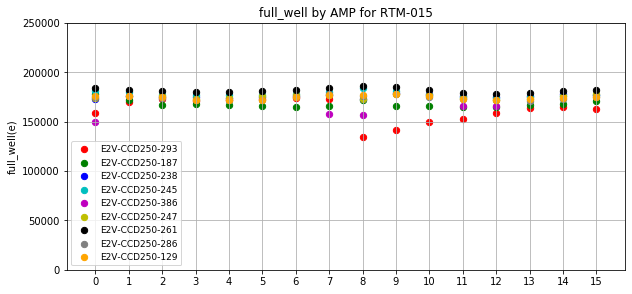

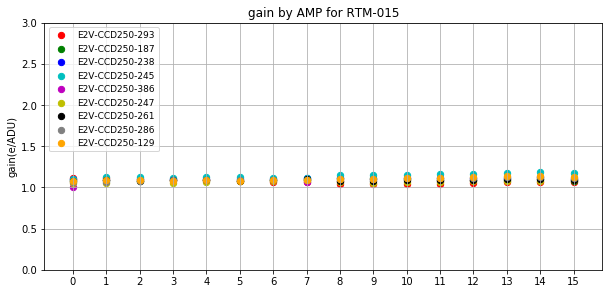

Run  12027 :


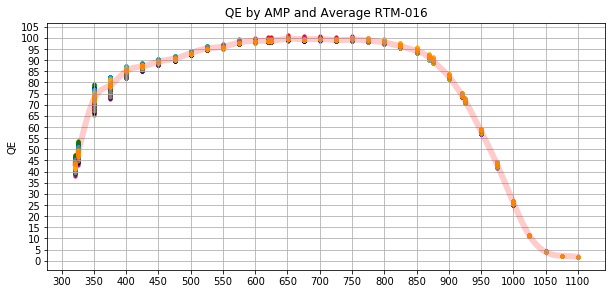

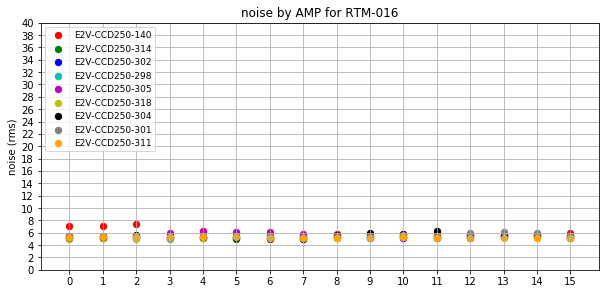

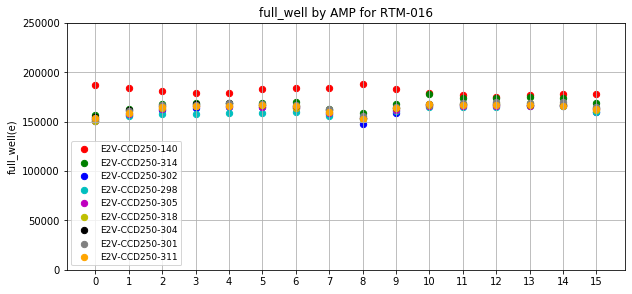

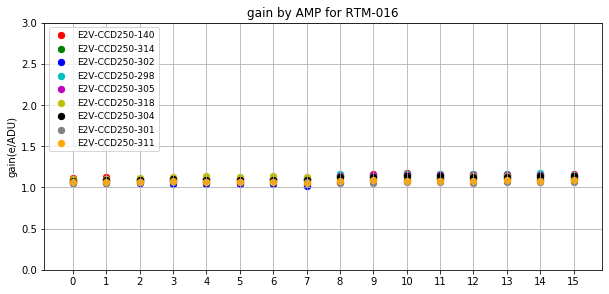

Run  12086 :


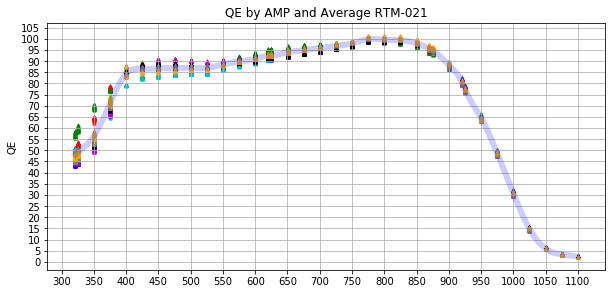

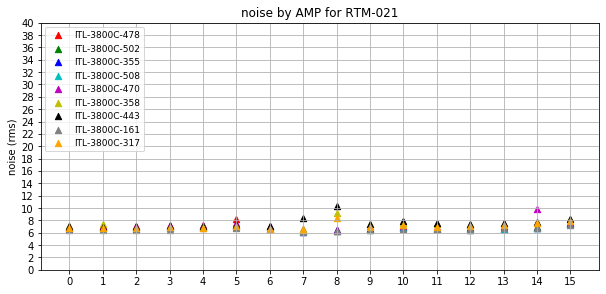

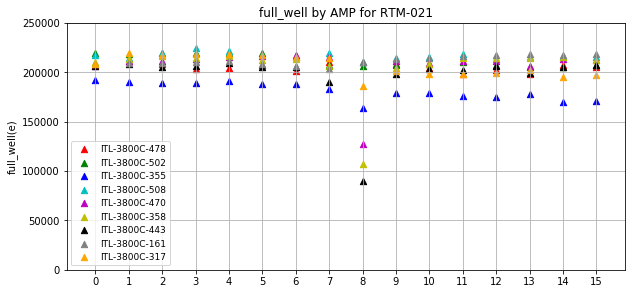

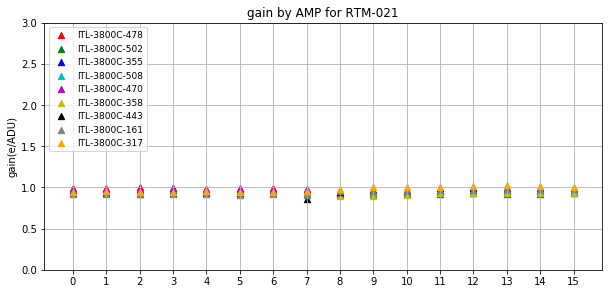

Run  12120 :


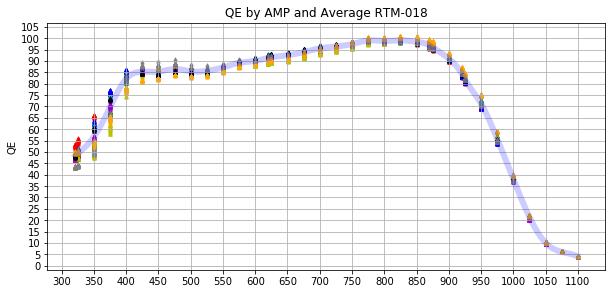

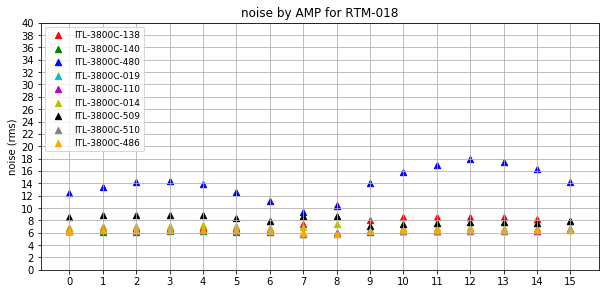

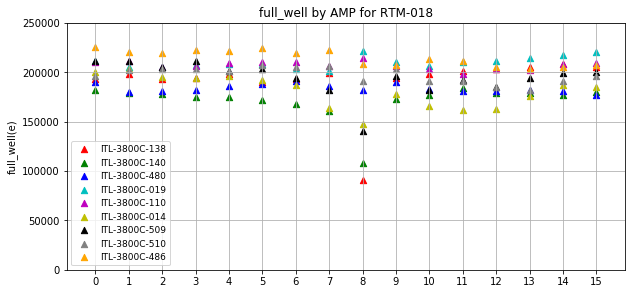

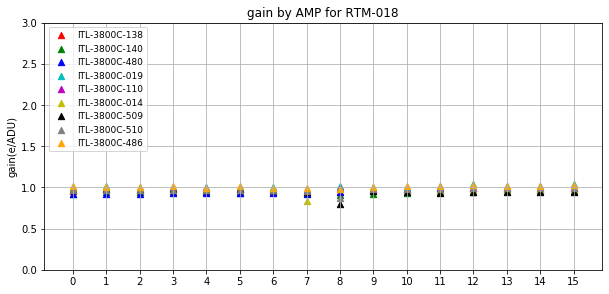

Run  12139 :


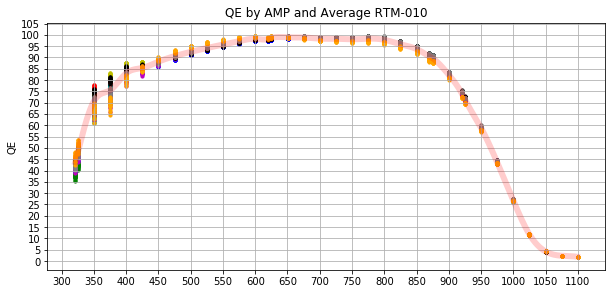

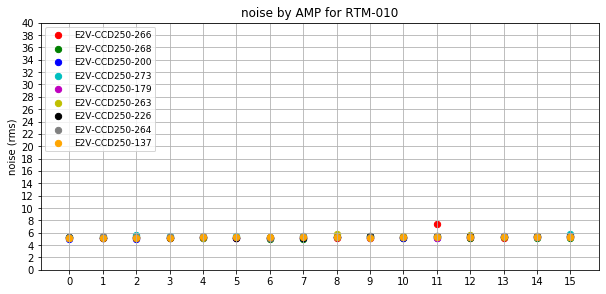

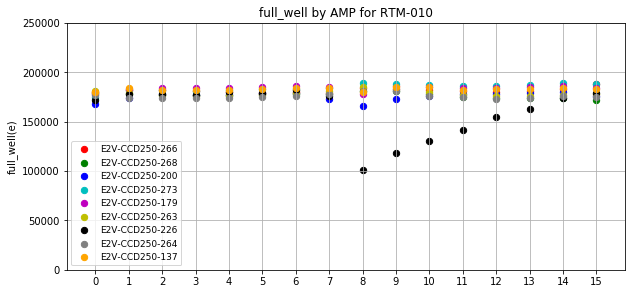

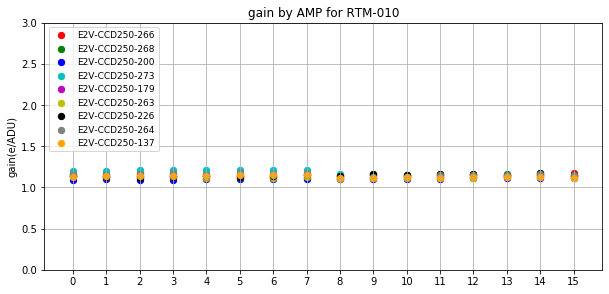

In [7]:
qepath='/Users/ritz/LSST/CCD-analysis/raftResults/2020Jan/'
goodrun=[10517,10669,10722,10861,10928,10982,11063,11166,11351,11415,11671,11746,11808,11852,11903,11952,12002,12027,12086,12120,12139]
goodrun=[10517,10669,10722,10861,10928,10982,11166,11351,11415,11671,11746,11808,11852,11903,11952,12002,12027,12086,12120,12139]
# we'll skip run 11977, as that's for RTM-004 which is currently the spare raft.
#goodrun=[10517]
for i in range (len(goodrun)):
    print('Run ',goodrun[i],':')
    qecurve,qesimple,raft_name=raftplot(goodrun[i],qepath)

Run  11063 :
One bad segment of QE data


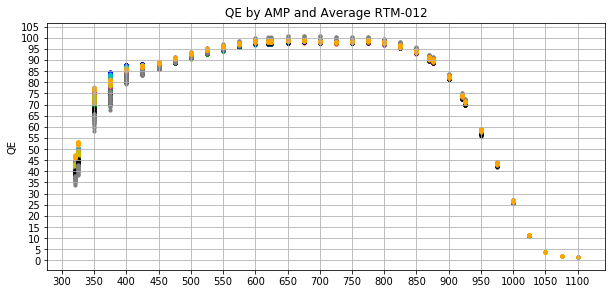

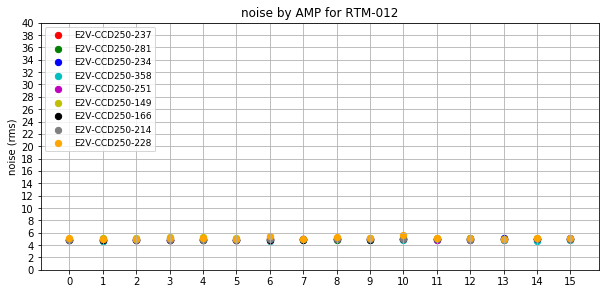

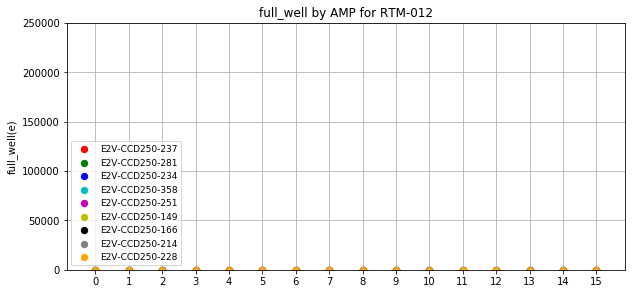

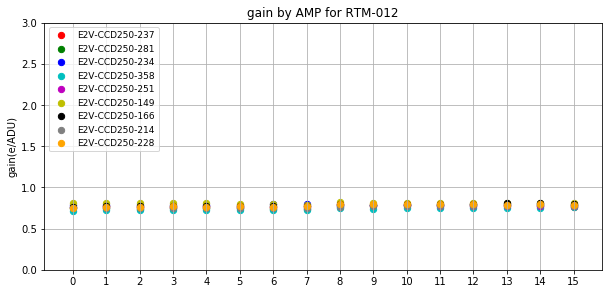

In [10]:
goodrun=[11063]
for i in range (len(goodrun)):
    print('Run ',goodrun[i],':')
    qecurve,qesimple,raft_name=raftplot(goodrun[i],qepath)